In [115]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import seaborn as sns
import nltk
import difflib
from sklearn.decomposition import LatentDirichletAllocation


pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [2]:
def show_card(name=None,show=False):
    if name is None:
        card_name = input('Enter the name of a commander: ').strip()
        if card_name.lower()=='exit':
            return
    else:
        card_name = name
    try:
        card = commanders[commanders.index.str.lower()==card_name.lower()]
        response = requests.get(card.image_uris.tolist()[0]['normal'])
    except:
        closest = difflib.get_close_matches(card_name,commanders.index.tolist(),len(commanders.index.tolist()),0)[0]
        print(f"Could not find {card_name}. Instead showing {closest}.")
        card = commanders[commanders.index==closest]
        response = requests.get(card.image_uris.tolist()[0]['normal'])
    img = Image.open(BytesIO(response.content))
    if show==True:
        display(img)
    return card.image_uris.tolist()[0]['normal']

# Load cards and drop columns

In [3]:
commanders = pd.read_json('Data/commander_legal.json')

In [4]:
commanders.columns

Index(['all_parts', 'artist', 'cmc', 'color_identity', 'color_indicator',
       'colors', 'edhrec_rank', 'games', 'highres_image', 'image_uris', 'lang',
       'layout', 'legalities', 'loyalty', 'mana_cost', 'name', 'oracle_text',
       'oversized', 'power', 'preview', 'printed_text', 'printed_type_line',
       'promo', 'released_at', 'reprint', 'reserved', 'scryfall_uri', 'set',
       'set_name', 'set_search_uri', 'tcgplayer_id', 'textless', 'toughness',
       'type_line', 'pop_cmdr', 'w', 'u', 'b', 'r', 'g', 'wu', 'ub', 'br',
       'rg', 'gw', 'wb', 'ur', 'bg', 'rw', 'gu', 'wub', 'ubr', 'brg', 'rgw',
       'gwu', 'wbg', 'urw', 'bgu', 'rwb', 'gur', 'wubr', 'ubrg', 'brgw',
       'rgwu', 'gwub', 'wubrg', 'colorless'],
      dtype='object')

**Only include legendary creatures with a normal layout and no partner mechanic**

In [5]:
commanders = commanders[commanders.type_line.str.contains('Legendary Creature')]

In [6]:
commanders = commanders[commanders.layout=='normal']

In [7]:
commanders = commanders[~commanders.oracle_text.str.contains('Partner')]

**Dataset includes reprints as a separate row, so drop those to have a unique list**

In [8]:
commanders.drop_duplicates('name','last',inplace=True)

**Set the index of my DataFrame to the card name**

In [9]:
commanders.set_index('name',inplace=True)

In [10]:
commanders.head()

,all_parts,artist,cmc,color_identity,color_indicator,colors,edhrec_rank,games,highres_image,image_uris,lang,layout,legalities,loyalty,mana_cost,oracle_text,oversized,power,preview,printed_text,printed_type_line,promo,released_at,reprint,reserved,scryfall_uri,set,set_name,set_search_uri,tcgplayer_id,textless,toughness,type_line,pop_cmdr,w,u,b,r,g,wu,ub,br,rg,gw,wb,ur,bg,rw,gu,wub,ubr,brg,rgw,gwu,wbg,urw,bgu,rwb,gur,wubr,ubrg,brgw,rgwu,gwub,wubrg,colorless
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Ink-Eyes, Servant of Oni",None,Wayne Reynolds,6,[B],None,[B],1759.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{4}{B}{B},"Ninjutsu {3}{B}{B} ({3}{B}{B}, Return an unblo...",False,5,None,NaN,NaN,False,2016-11-25,True,False,https://scryfall.com/card/pca/33/ink-eyes-serv...,pca,Planechase Anthology,https://api.scryfall.com/cards/search?order=se...,125443.0,False,4,Legendary Creature — Rat Ninja,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Higure, the Still Wind",None,Christopher Moeller,5,[U],None,[U],2866.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{3}{U}{U},"Ninjutsu {2}{U}{U} ({2}{U}{U}, Return an unblo...",False,3,None,NaN,NaN,False,2016-11-25,True,False,https://scryfall.com/card/pca/18/higure-the-st...,pca,Planechase Anthology,https://api.scryfall.com/cards/search?order=se...,125438.0,False,4,Legendary Creature — Human Ninja,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Zedruu the Greathearted,None,Mark Zug,4,"[R, U, W]",None,"[R, U, W]",3048.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{1}{U}{R}{W},"At the beginning of your upkeep, you gain X li...",False,2,None,NaN,NaN,False,2016-11-11,True,False,https://scryfall.com/card/c16/231/zedruu-the-g...,c16,Commander 2016,https://api.scryfall.com/cards/search?order=se...,124013.0,False,4,Legendary Creature — Minotaur Monk,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Sydri, Galvanic Genius",None,Terese Nielsen,3,"[B, U, W]",None,"[B, U, W]",2767.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{W}{U}{B},{U}: Target noncreature artifact becomes an ar...,False,2,None,NaN,NaN,False,2016-11-11,True,False,https://scryfall.com/card/c16/224/sydri-galvan...,c16,Commander 2016,https://api.scryfall.com/cards/search?order=se...,124649.0,False,2,Legendary Creature — Human Artificer,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Selvala, Explorer Returned",None,Tyler Jacobson,3,"[G, W]",None,"[G, W]",1198.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{1}{G}{W},Parley — {T}: Each player reveals the top card...,False,2,None,NaN,NaN,False,2016-11-11,True,False,https://scryfall.com/card/c16/220/selvala-expl...,c16,Commander 2016,https://api.scryfall.com/cards/search?order=se...,124623.0,False,4,Legendary Creature — Elf Scout,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


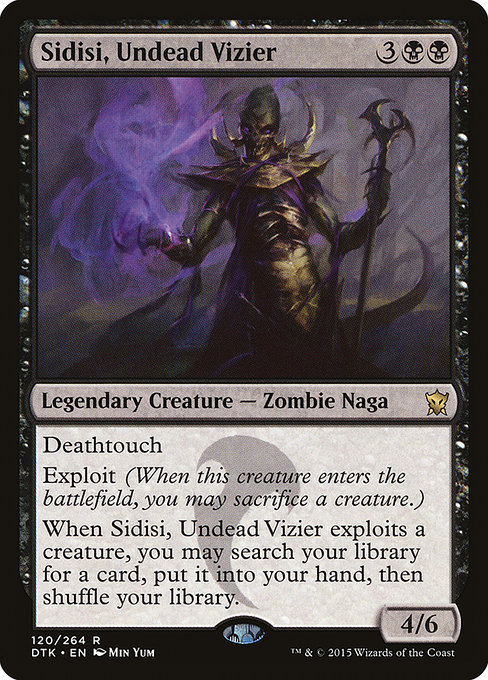

'https://img.scryfall.com/cards/normal/front/6/e/6ea5dbba-6114-4d97-9363-817ab9e896d3.jpg?1562788006'

In [42]:
show_card(commanders.sort_values('edhrec_rank').iloc[0].head().name,True)

## LDA to find topics of commanders

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords

**Stopwords started with standard english stopwords and the names of the cards. Other keywords were added manually after trial and error to see which words were appearing in too many topics at once**

In [81]:
stop = list(set(stopwords.words('english')))
names = [card_name.lower().replace(',','').split() for card_name in commanders.index]
for name in names:
    stop.extend(name)
stop += ['gain','give','each','among','least','less','choice','until','end','start','beginning','upkeep','may',
         'put','under','whenever','except','player','cost','turn','gets','get','pay','deals','control',
         'controls','color','order','lose','battlefield','target','spell','card','equal','ability','activate',
         'next','step','cast','owner','time','would','instead','number','onto','though','long',
         'choose','converted','mana','permanent','another','card','cards','horsemanship','flying','creature',
         'creatures','opponents','countered','divinity', 'divinity counter', 'enters opponent', 'equipment',
         'experience', 'name', 'type', 'vampire','create','creates','trample','reach','lifelink','first',
         'double','haste','strike','white','blue','black','red','green','becomes','all','vigilance','unless',
         'blocked','tap','tapped','untap','gains','reveal','return','add', 'opponent','enters','power','toughness']
stop = list(set(stop))

In [82]:
all_cards = pd.read_json('Data/commander_legal.json')
all_text = [text.strip().lower().split('\n') for text in commanders.oracle_text]
temp = []
for text in all_text:
    temp.extend(text)
all_text = temp
all_tf_vectorizer = CountVectorizer(max_df=0.9, min_df=10,stop_words=stop, analyzer='word',ngram_range=(1,2))
all_tf = all_tf_vectorizer.fit_transform(all_text)
all_tf_feature_names = all_tf_vectorizer.get_feature_names()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ancestor', 'arms', 'ben', 'blossom', 'boar', 'cho', 'clad', 'corpse', 'counter', 'dal', 'devouring', 'dûl', 'eight', 'eye', 'eyed', 'gilt', 'gitaxias', 'glass', 'gnawer', 'gold', 'half', 'heron', 'ihsan', 'il', 'ink', 'ishi', 'jiki', 'kagachi', 'kanar', 'kiki', 'kin', 'kuar', 'lim', 'manno', 'maro', 'marrow', 'mizzet', 'mors', 'nature', 'nephalia', 'night', 'niv', 'opal', 'palladia', 'phoenix', 'praetors', 'raze', 'rrik', 'sanity', 'scar', 'seasons', 'sek', 'selesnya', 'ship', 'shizo', 'sleeping', 'sol', 'spinner', 'striped', 'tail', 'tails', 'thousand', 'ur', 'yavimaya', 'zo', 'zu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [83]:
texts = [text.strip().lower().replace('\n',' ') for text in commanders.oracle_text]

In [84]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=10,stop_words=stop, analyzer='word',ngram_range=(1,2)) # max_df=0.95, min_df=10,
tf = tf_vectorizer.fit_transform(texts)
tf_feature_names = tf_vectorizer.get_feature_names()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ancestor', 'arms', 'ben', 'blossom', 'boar', 'cho', 'clad', 'corpse', 'counter', 'dal', 'devouring', 'dûl', 'eight', 'eye', 'eyed', 'gilt', 'gitaxias', 'glass', 'gnawer', 'gold', 'half', 'heron', 'ihsan', 'il', 'ink', 'ishi', 'jiki', 'kagachi', 'kanar', 'kiki', 'kin', 'kuar', 'lim', 'manno', 'maro', 'marrow', 'mizzet', 'mors', 'nature', 'nephalia', 'night', 'niv', 'opal', 'palladia', 'phoenix', 'praetors', 'raze', 'rrik', 'sanity', 'scar', 'seasons', 'sek', 'selesnya', 'ship', 'shizo', 'sleeping', 'sol', 'spinner', 'striped', 'tail', 'tails', 'thousand', 'ur', 'yavimaya', 'zo', 'zu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [85]:
sents = [text.strip().lower().split('\n') for text in commanders.oracle_text]
temp = []
for text in sents:
    temp.extend(text)
sents = temp

In [86]:
sents_tf_vectorizer = CountVectorizer(max_df=0.9, min_df=10,stop_words=stop, analyzer='word',ngram_range=(1,2)) # max_df=0.95, min_df=10,
sents_tf = sents_tf_vectorizer.fit_transform(sents)
sents_tf_feature_names = sents_tf_vectorizer.get_feature_names()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ancestor', 'arms', 'ben', 'blossom', 'boar', 'cho', 'clad', 'corpse', 'counter', 'dal', 'devouring', 'dûl', 'eight', 'eye', 'eyed', 'gilt', 'gitaxias', 'glass', 'gnawer', 'gold', 'half', 'heron', 'ihsan', 'il', 'ink', 'ishi', 'jiki', 'kagachi', 'kanar', 'kiki', 'kin', 'kuar', 'lim', 'manno', 'maro', 'marrow', 'mizzet', 'mors', 'nature', 'nephalia', 'night', 'niv', 'opal', 'palladia', 'phoenix', 'praetors', 'raze', 'rrik', 'sanity', 'scar', 'seasons', 'sek', 'selesnya', 'ship', 'shizo', 'sleeping', 'sol', 'spinner', 'striped', 'tail', 'tails', 'thousand', 'ur', 'yavimaya', 'zo', 'zu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [87]:
# I want less topics so that topics are more general and have more overlap
lda=LatentDirichletAllocation(n_components=5,random_state=30,verbose=0,n_jobs=-1,max_iter=50)

In [88]:
# Train the LDA model on individual lines in card text to generate general topics.
# Then test it on full card text to determine the overall topic of the card based on its different effects
lda.fit(all_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=5, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=30, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [108]:
import joblib
joblib.dump(lda,'lda-tfidf.pkl')

['lda-tfidf.pkl']

In [110]:
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append({topic_idx:[{feature_names[i]:topic[i]} for i in topic.argsort()[:-no_top_words-1:-1]]})
        print ("Topic %d:" % (topic_idx),end='\t')
        print ("\n\t\t".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]),end='\n\n')
    return topics

topic_words = display_topics(lda, all_tf_feature_names, 10)

Topic 0:	graveyard
		library
		top
		top library
		dies
		attacking
		dealt
		legendary
		planeswalker
		damage

Topic 1:	damage
		combat
		combat damage
		land
		draw
		additional
		counters
		remove
		counter
		three

Topic 2:	library
		instant
		spells
		sorcery
		shuffle
		search
		indestructible
		shuffle library
		search library
		instant sorcery

Topic 3:	token
		artifact
		draw
		discard
		counters
		attack
		copy
		loses
		untapped
		blocks

Topic 4:	counter
		sacrifice
		attacks
		permanents
		deathtouch
		defending
		tokens
		sacrifices
		flash
		draw



In [111]:
from wordcloud import WordCloud

In [112]:
topic_words[0]

{0: [{'graveyard': 123.1934684968525},
  {'library': 87.44533771999617},
  {'top': 64.19570418873711},
  {'top library': 40.19596005464112},
  {'dies': 33.69941814125687},
  {'attacking': 28.249082664796187},
  {'dealt': 28.19483047697162},
  {'legendary': 24.19182845694028},
  {'planeswalker': 20.18757104215256},
  {'damage': 19.49197202470506}]}

In [153]:
def plot_wcs(topic_words):
    c = 0
    for topic in topic_words:
        merged = {}
        for d in list(topic.values())[0]:
            merged.update(d)
        wc = WordCloud(background_color='white').generate_from_frequencies(merged)
        plt.title(f'Topic {c}',size=25)
        plt.imshow(wc,interpolation='bilinear')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        c += 1

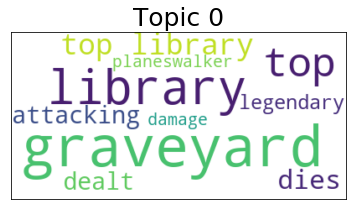

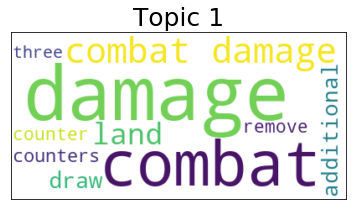

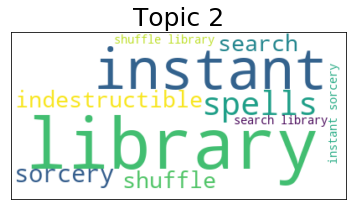

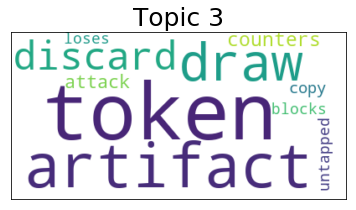

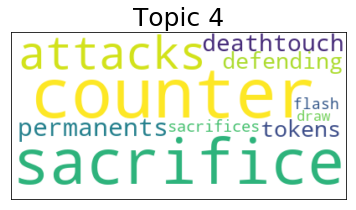

In [155]:
plot_wcs(topic_words)

**Manually look through the top words that describe each topic and relabel them to make sense**

In [99]:
cmdr_topics = pd.DataFrame(lda.transform(tf))
cmdr_topics.index = commanders.index
cmdr_topics.columns = ['Deck Thinners','Consistant Damage','Library Searchers','Army Makers','Counters Everywhere']
cmdr_topics['edhrec_rank'] = commanders['edhrec_rank']

In [100]:
cmdr_topics.describe()

,Deck Thinners,Consistant Damage,Library Searchers,Army Makers,Counters Everywhere,edhrec_rank
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.192215,0.209501,0.171094,0.216393,0.210797,5225.256906
std,0.216226,0.227191,0.205063,0.232051,0.214006,4195.012044
min,0.015390,0.011145,0.012560,0.011132,0.011111,179.000000
25%,0.041744,0.048583,0.040000,0.040482,0.050000,2101.500000
50%,0.100000,0.100001,0.066668,0.100001,0.101654,4027.000000
75%,0.252338,0.299929,0.200000,0.323529,0.310938,6888.750000
max,0.933251,0.866518,0.931831,0.899894,0.884364,19144.000000


In [102]:
cmdr_topics.sort_values('Deck Thinners',ascending=False).head(10)

,Deck Thinners,Consistant Damage,Library Searchers,Army Makers,Counters Everywhere,edhrec_rank
name,,,,,,
"Kaalia, Zenith Seeker",0.933251,0.016667,0.016748,0.016667,0.016667,7526.0
"Munda, Ambush Leader",0.933167,0.016667,0.016733,0.016667,0.016766,5222.0
"Avacyn, Guardian Angel",0.932324,0.017675,0.016667,0.016667,0.016667,4351.0
"Depala, Pilot Exemplar",0.927174,0.018182,0.018280,0.018182,0.018182,5072.0
Niv-Mizzet Reborn,0.919877,0.020000,0.020122,0.020000,0.020000,3940.0
"Syr Konrad, the Grim",0.919271,0.020645,0.020048,0.020000,0.020036,7208.0
Gisa and Geralf,0.899672,0.025000,0.025079,0.025000,0.025249,1617.0
"Gonti, Lord of Luxury",0.870263,0.013334,0.013389,0.013334,0.089681,408.0
Ambassador Laquatus,0.865947,0.033875,0.033511,0.033334,0.033334,7287.0


In [109]:
cmdr_topics.to_json(r'Data/tfidf-LDA-commander-topics.json')

# Recommend by topic similarity to another card
**Meant for veterans of magic who are looking for another commander to try**

In [103]:
def recommend_by_commander():
    topics = cmdr_topics.columns[:-1]
    inpt = input("Enter the name of a commander you like: ")
    if inpt not in cmdr_topics.index.tolist():
        inpt = difflib.get_close_matches(inpt,cmdr_topics.index.tolist(),len(cmdr_topics.index.tolist()),0)[0]
    inpt_row = cmdr_topics.loc[inpt]
    scores = pd.Series(index=cmdr_topics.index)
    scores.loc[inpt] = -1
    for idx, row in cmdr_topics.drop(index=inpt).iterrows():
        scores.loc[idx] = sum([np.absolute(row.loc[topic]-inpt_row.loc[topic]) for topic in topics])
    scores = (scores*100000)+cmdr_topics['edhrec_rank']
    scores = scores.sort_values().index.tolist()[1:]
    print(f"Showing commanders most similar to: {inpt}")
    offset = 1
    while(1):
        for idx in range(offset,offset+5):
            print(f"\t{idx}. {scores[idx-1]}\n{show_card(scores[idx-1])}")
        move = input("(N)ext or (P)rev? ").lower().strip()
        if move == 'next' or move == 'n':
            offset += 5
        elif move == 'prev' or move == 'p':
            offset -= 5
        else:
            return
        if offset < 0 or offset+5 > len(scores):
            print("End of list.")
            return

In [104]:
recommend_by_commander()

Enter the name of a commander you like: Nicol Bolas
Showing commanders most similar to: Nicol Bolas
	1. Basandra, Battle Seraph
https://img.scryfall.com/cards/normal/front/6/e/6e5baa27-3f6b-49bb-9927-5afc21b9cc3f.jpg?1562634024
	2. Ishi-Ishi, Akki Crackshot
https://img.scryfall.com/cards/normal/front/8/e/8e94fec2-dc56-4961-ba80-b9c904a345ab.jpg?1562878352
	3. Myojin of Night's Reach
https://img.scryfall.com/cards/normal/front/1/3/13a295b0-535e-4c2d-879d-62603d1f2f1b.jpg?1562757911
	4. Myojin of Cleansing Fire
https://img.scryfall.com/cards/normal/front/a/0/a0570ba0-2877-46f6-acea-6913f8915d6d.jpg?1562763011
	5. Hythonia the Cruel
https://img.scryfall.com/cards/normal/front/a/9/a9fbc814-4281-4ac6-a844-68bcd848f229.jpg?1562824218
(N)ext or (P)rev? 


# Recommend by pre-determined topics.
**Meant to give beginners to Magic a place to start**

In [105]:
def recommend_by_topic():
    topics = cmdr_topics.columns[:-1]
    print("Enter number(s) of archtypes you like separated by spaces:")
    for topic_idx in range(len(topics)):
        print(f"\t{topic_idx+1}. {topics[topic_idx]}")
    likes = input().split()
    try:
        likes = list(map(int,likes))
    except:
        print("Non-digit entered.")
        return
    likes = list(set(likes))
    if len(likes)==0:
        return
    if min(likes) < 1 or max(likes) > len(topics):
        print('Entered a number out of range')
        return
    likes = [topics[i-1] for i in likes]
    top_recs = (cmdr_topics[likes]-(1/len(likes))).abs().sum(axis=1)
    top_recs = top_recs[top_recs < 0.4]
    top_recs = (top_recs*100000) + cmdr_topics['edhrec_rank']
    top_recs = top_recs.sort_values().dropna().index.tolist()
    print("--------------------------------------------------------------------")
    print(f"Found {len(top_recs)} possible commanders")
    print(f"I recommend these commanders for {', '.join(likes)}")
    offset = 1
    while(1):
        for idx in range(offset,offset+5):
            print(f"\t{idx}. {top_recs[idx-1]}\n{show_card(top_recs[idx-1])}")
        move = input("(N)ext or (P)rev? ").lower().strip()
        if move == 'next' or move == 'n':
            offset += 5
        elif move == 'prev' or move == 'p':
            offset -= 5
        else:
            return
        if offset < 0 or offset+5 > len(top_recs):
            print("End of list.")
            return
    
#     scores = cmdr_topics[likes].diff(axis=1).fillna(0).abs().sum(axis=1)
#     print(scores.sort_values())

In [107]:
recommend_by_topic()

Enter number(s) of archtypes you like separated by spaces:
	1. Deck Thinners
	2. Consistant Damage
	3. Library Searchers
	4. Army Makers
	5. Counters Everywhere
1 2 3 4 5
--------------------------------------------------------------------
Found 69 possible commanders
I recommend these commanders for Deck Thinners, Consistant Damage, Library Searchers, Army Makers, Counters Everywhere
	1. Elesh Norn, Grand Cenobite
https://img.scryfall.com/cards/normal/front/7/8/78c2bfef-06a5-4c7f-8283-ea3fb673b7a1.jpg?1562850573
	2. Urabrask the Hidden
https://img.scryfall.com/cards/normal/front/1/b/1ba50b62-710e-4c92-9e02-736c1a987bb9.jpg?1562846333
	3. Tetsuko Umezawa, Fugitive
https://img.scryfall.com/cards/normal/front/1/6/16185c50-f7b8-4cea-a129-dfad8e9df781.jpg?1562731837
	4. Drana, Kalastria Bloodchief
https://img.scryfall.com/cards/normal/front/2/c/2c58ce5e-b038-4376-a5f4-9849baa255b9.jpg?1562603606
	5. Omnath, Locus of Mana
https://img.scryfall.com/cards/normal/front/5/4/54544da6-a24f-4351-ae

# Wrap both recommdendation systems into a single function

In [865]:
def recommender():
    while(1):
        print("How would you like to be recommended a new Commander? (Enter the number)")
        print("\t1. There's a commander I liked playing before!")
        print("\t2. I want some general playstyles to chooose from.")
        print("\t3. WHAT'S COMMANDER???")
        how = input().strip()
        if how == '':
            return
        try:
            how = int(how)
            if how == 3:
                print("""
-----------------------------------------------------------------------------------
   "Commander is an exciting, unique way to play Magic that is all about awesome 
    legendary creatures, big plays, and battling your friends in epic multiplayer 
    games! In Commander, each player chooses a legendary creature as the commander 
    of their deck. They then play with a 99-card deck that contains only cards of 
    their commander's colors. Also, other than basic lands, each deck can only use 
    one copy of any card. During the game, you can cast your commander multiple 
    times, meaning your favorite Legendary Creature can come back again and again 
    to lead the charge as you battle for victory!"
        Taken from Wizards of the Coast site.
-----------------------------------------------------------------------------------
""")
            elif how in [1,2]:
                break
            else:
                print('Enter 1, 2, or 3')
        except ValueError:
            print('Enter 1, 2, or 3.')
    if how == 1:
        recommend_by_commander()
    elif how == 2:
        recommend_by_topic()

In [1307]:
recommender()

How would you like to be recommended a new Commander? (Enter the number)
	1. There's a commander I liked playing before!
	2. I want some general playstyles to chooose from.
	3. WHAT'S COMMANDER???
1
Enter a commander(s) you like: Nicol Bolas
Showing commanders most similar to: Nicol Bolas
	1. Kynaios and Tiro of Meletis
https://img.scryfall.com/cards/normal/front/9/7/97fa8615-2b6c-445a-bcaf-44a7e847bf65.jpg?1562411365
	2. Infernal Kirin
https://img.scryfall.com/cards/normal/front/c/7/c79e7a4c-e0e7-42ac-b125-1db2f3d9325c.jpg?1562495650
	3. Tor Wauki
https://img.scryfall.com/cards/normal/front/e/e/eef9d043-c9ab-4215-acfc-9065250513d1.jpg?1562943007
	4. Brigid, Hero of Kinsbaile
https://img.scryfall.com/cards/normal/front/d/a/da70a20f-213e-4d79-a46f-1ef1fc3f4a51.jpg?1562370621
	5. Ben-Ben, Akki Hermit
https://img.scryfall.com/cards/normal/front/d/7/d7c015a6-4d7d-421b-84fa-30bf070cff83.jpg?1562764687
(N)ext or (P)rev? 
